**Table of contents**<a id='toc0_'></a>    
- 1. [Problem 1: Production economy and CO2 taxation](#toc1_)    
- 2. [Problem 2: Career choice model](#toc2_)    
- 3. [Problem 3: Barycentric interpolation](#toc3_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
# Write your code here
import numpy as np
from types import SimpleNamespace

## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

Consider a production economy with two firms indexed by $j \in \{1,2\}$. Each produce its own good. They solve

$$
\begin{align*}
\max_{y_{j}}\pi_{j}&=p_{j}y_{j}-w_{j}\ell_{j}\\\text{s.t.}\;&y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

Optimal firm behavior is

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}} \\
y_{j}^{\star}(w,p_{j})&=A\left(\ell_{j}^{\star}(w,p_{j})\right)^{\gamma}
\end{align*}
$$

The implied profits are

$$
\pi_{j}^*(w,p_{j})=\frac{1-\gamma}{\gamma}w\cdot\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
$$

A single consumer supplies labor, and consumes the goods the firms produce. She also recieves the implied profits of the firm.<br>
She solves:

$$
\begin{align*}
U(p_1,p_2,w,\tau,T) = \max_{c_{1},c_{2},\ell} & \log(c_{1}^{\alpha}c_{2}^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} \\
\text{s.t.}\,\,\,&p_{1}c_{1}+(p_{2}+\tau)c_{2}=w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})
\end{align*}
$$

where $\tau$ is a tax and $T$ is lump-sum transfer. <br>
For a given $\ell$, it can be shown that optimal behavior is

$$
\begin{align*}
c_{1}(\ell)&=\alpha\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{1}} \\
c_{2}(\ell)&=(1-\alpha)\frac{w\ell+T+\pi_{1}^*(w,p_{1})+\pi_{2}^*(w,p_{2})}{p_{2}+\tau} \\
\end{align*}
$$
Such that optimal behavior is:
$$
\ell^* = \underset{\ell}{\arg\max} \log(\left(c_{1}(\ell)\right)^{\alpha}\cdot \left(c_{2}(\ell)\right)^{1-\alpha})-\nu\frac{\ell^{1+\epsilon}}{1+\epsilon} 
$$
With optimal consumption:
$$
\begin{align*}
c_1^*=c_{1}(\ell^*) \\
c_2^*=c_{2}(\ell^*)\\
\end{align*}
$$


The government chooses $\tau$ and balances its budget so $T=\tau c_2^*$. We initially set $\tau,T=0$.

Market clearing requires:

1. Labor market: $\ell^* = \ell_1^* + \ell_2^*$
1. Good market 1: $c_1^* = y_1^*$
1. Good market 2: $c_2^* = y_2^*$


**Question 1:** Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.

In [2]:
import numpy as np
import pandas as pd

# Define parameters
A = 1  # Technology parameter
gamma = 0.5  # Production elasticity
alpha = 0.5  # Consumer preference parameter
nu = 1  # Utility parameter
epsilon = 0.5  # Labor disutility parameter
w = 1  # Wage (numeraire)

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

# Checking market clearing conditions
results = []
for p1 in p1_range:
    for p2 in p2_range:
        labor1 = optimal_labor(p1, A, w, gamma)
        labor2 = optimal_labor(p2, A, w, gamma)
        output1 = optimal_output(labor1, A, gamma)
        output2 = optimal_output(labor2, A, gamma)
        pi1 = implied_profits(p1, A, w, gamma)
        pi2 = implied_profits(p2, A, w, gamma)
        
        total_labor = labor1 + labor2
        c1, c2 = optimal_consumption(w, total_labor, alpha, p1, p2, pi1, pi2, tau=0)
        
        # Market clearing conditions
        labor_clearing = np.isclose(total_labor, labor1 + labor2)
        good1_clearing = np.isclose(c1, output1)
        good2_clearing = np.isclose(c2, output2)
        
        results.append({
            'p1': p1,
            'p2': p2,
            'Labor Clearing': labor_clearing,
            'Good1 Clearing': good1_clearing,
            'Good2 Clearing': good2_clearing
        })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
results_df



,p1,p2,Labor Clearing,Good1 Clearing,Good2 Clearing
0,0.1,0.100000,True,True,True
1,0.1,0.311111,True,False,False
2,0.1,0.522222,True,False,False
3,0.1,0.733333,True,False,False
4,0.1,0.944444,True,False,False
...,...,...,...,...,...
95,2.0,1.155556,True,False,False
96,2.0,1.366667,True,False,False
97,2.0,1.577778,True,False,False
98,2.0,1.788889,True,False,False


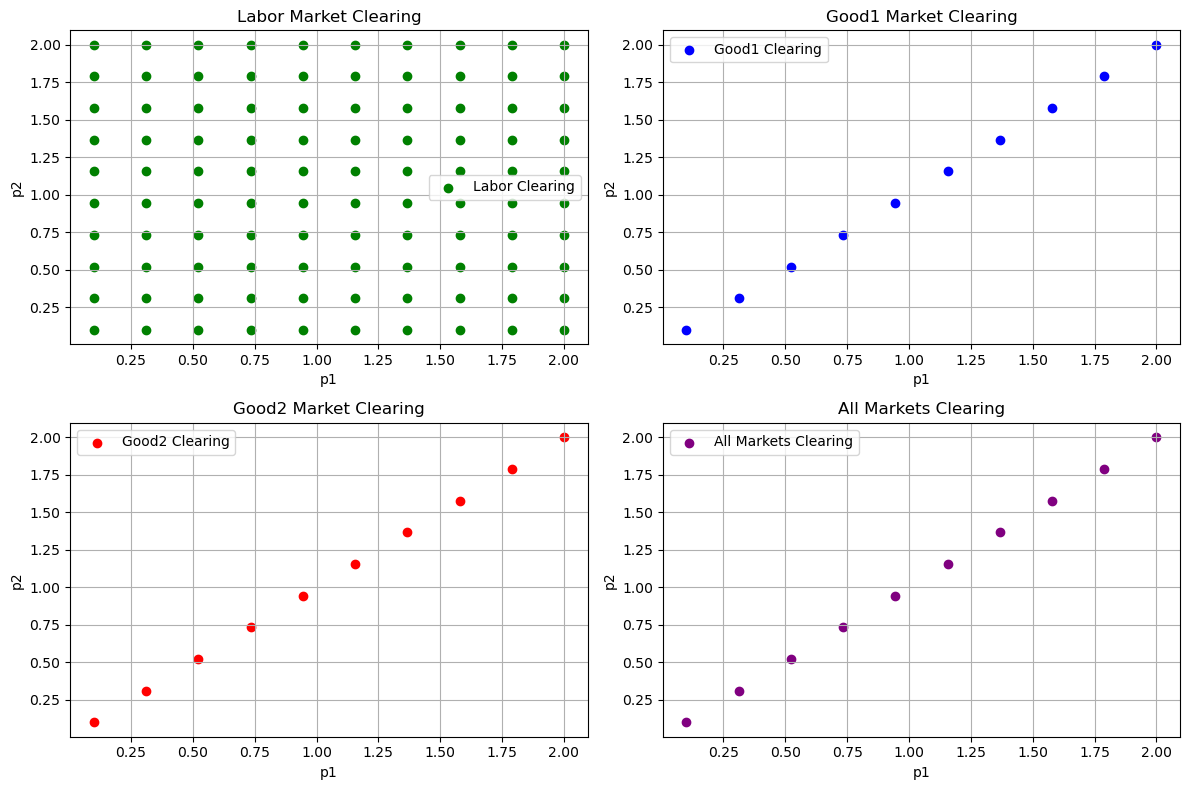

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the results based on market clearing conditions
labor_clear = results_df[results_df['Labor Clearing']]
good1_clear = results_df[results_df['Good1 Clearing']]
good2_clear = results_df[results_df['Good2 Clearing']]
all_clear = results_df[(results_df['Labor Clearing']) & (results_df['Good1 Clearing']) & (results_df['Good2 Clearing'])]

# Plotting
plt.figure(figsize=(12, 8))

# Plot for Labor Clearing
plt.subplot(2, 2, 1)
plt.scatter(labor_clear['p1'], labor_clear['p2'], c='green', label='Labor Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Labor Market Clearing')
plt.legend()
plt.grid(True)

# Plot for Good1 Clearing
plt.subplot(2, 2, 2)
plt.scatter(good1_clear['p1'], good1_clear['p2'], c='blue', label='Good1 Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good1 Market Clearing')
plt.legend()
plt.grid(True)

# Plot for Good2 Clearing
plt.subplot(2, 2, 3)
plt.scatter(good2_clear['p1'], good2_clear['p2'], c='red', label='Good2 Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('Good2 Market Clearing')
plt.legend()
plt.grid(True)

# Plot for All Clearing Conditions
plt.subplot(2, 2, 4)
plt.scatter(all_clear['p1'], all_clear['p2'], c='purple', label='All Markets Clearing', marker='o')
plt.xlabel('p1')
plt.ylabel('p2')
plt.title('All Markets Clearing')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Labor market clearing: 

Good 1 and 2 market clearing (Walras law):

All market clering

In [4]:
par = SimpleNamespace()

# firms
par.A = 1.0
par.gamma = 0.5

# households
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0

# government
par.tau = 0.0
par.T = 0.0

# Question 3
par.kappa = 0.1

**Question 2:** Find the equilibrium prices $p_1$ and $p_2$.<br>
*Hint: you can use Walras' law to only check 2 of the market clearings*

          p1        p2
58  1.155556  1.788889


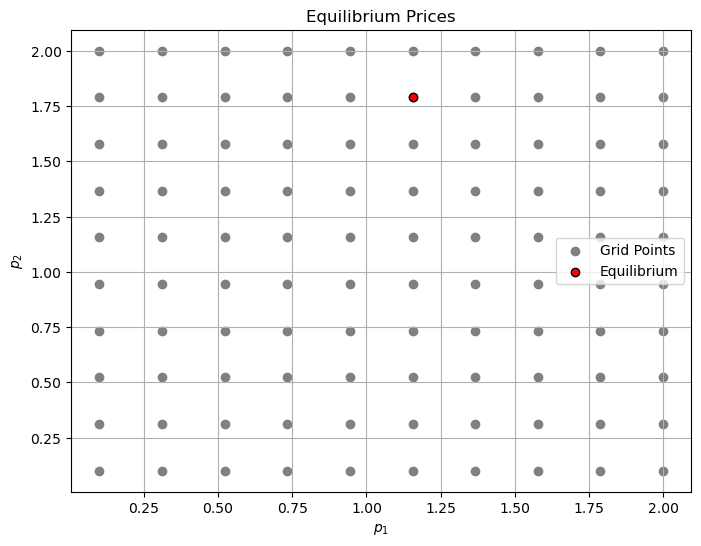

In [5]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import scipy.optimize as opt
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.tau = 0.0
par.T = 0.0
w = 1.0  # Wage is numeraire

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

# Equilibrium conditions
def equilibrium_conditions(prices):
    p1, p2 = prices
    
    # Firm 1
    labor1 = optimal_labor(p1, par.A, w, par.gamma)
    output1 = optimal_output(labor1, par.A, par.gamma)
    pi1 = implied_profits(p1, par.A, w, par.gamma)
    
    # Firm 2
    labor2 = optimal_labor(p2, par.A, w, par.gamma)
    output2 = optimal_output(labor2, par.A, par.gamma)
    pi2 = implied_profits(p2, par.A, w, par.gamma)
    
    # Total labor
    total_labor = labor1 + labor2
    
    # Consumer optimal consumption
    c1, c2 = optimal_consumption(w, total_labor, par.alpha, p1, p2, pi1, pi2, par.tau)
    
    # Market clearing conditions
    good1_clearing = c1 - output1
    good2_clearing = c2 - output2
    
    return [good1_clearing, good2_clearing]

# Price ranges
p1_range = np.linspace(0.1, 2.0, 10)
p2_range = np.linspace(0.1, 2.0, 10)

# Grid search for equilibrium prices
results = []
for p1 in p1_range:
    for p2 in p2_range:
        conditions = equilibrium_conditions([p1, p2])
        results.append({
            'p1': p1,
            'p2': p2,
            'Good1 Clearing': np.abs(conditions[0]),
            'Good2 Clearing': np.abs(conditions[1])
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the minimum values for good market clearing conditions
min_good1_clear = results_df['Good1 Clearing'].min()
min_good2_clear = results_df['Good2 Clearing'].min()

equilibrium_df = results_df[(results_df['Good1 Clearing'] == min_good1_clear) & (results_df['Good2 Clearing'] == min_good2_clear)]

# Display equilibrium prices
equilibrium_prices = equilibrium_df[['p1', 'p2']]
print(equilibrium_prices)

# Plot equilibrium prices with p1 on x-axis and p2 on y-axis
plt.figure(figsize=(8, 6))
plt.scatter(results_df['p1'], results_df['p2'], c='gray', label='Grid Points')
plt.scatter(equilibrium_df['p1'], equilibrium_df['p2'], color='red', edgecolor='black', label='Equilibrium')
plt.xlabel('$p_1$')
plt.ylabel('$p_2$')
plt.title('Equilibrium Prices')
plt.legend()
plt.grid(True)
plt.show()



Intuition: p_2 higher than p_1 due to consumer preferences. She values good 2 more, which is reflected in the price of good 2.

Assume the government care about the social welfare function:

$$
SWF = U - \kappa y_2^*
$$

Here $\kappa$ measures the social cost of carbon emitted by the production of $y_2$ in equilibrium.

**Question 3:** What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?

          tau         T       SWF
140  0.368421  0.000000 -0.791354
141  0.368421  0.052632 -0.791354
142  0.368421  0.105263 -0.791354
143  0.368421  0.157895 -0.791354
144  0.368421  0.210526 -0.791354
145  0.368421  0.263158 -0.791354
146  0.368421  0.315789 -0.791354
147  0.368421  0.368421 -0.791354
148  0.368421  0.421053 -0.791354
149  0.368421  0.473684 -0.791354
150  0.368421  0.526316 -0.791354
151  0.368421  0.578947 -0.791354
152  0.368421  0.631579 -0.791354
153  0.368421  0.684211 -0.791354
154  0.368421  0.736842 -0.791354
155  0.368421  0.789474 -0.791354
156  0.368421  0.842105 -0.791354
157  0.368421  0.894737 -0.791354
158  0.368421  0.947368 -0.791354
159  0.368421  1.000000 -0.791354


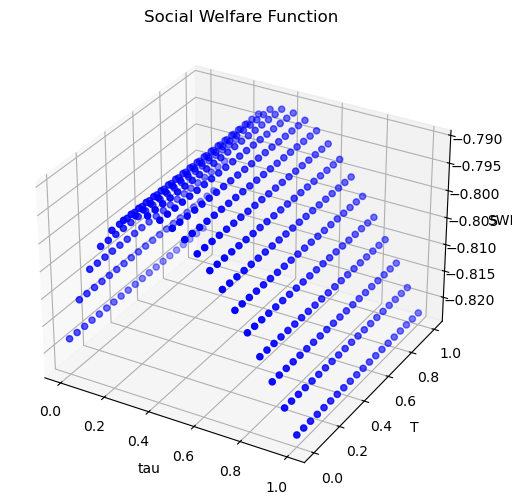

In [6]:
import numpy as np
import pandas as pd
from types import SimpleNamespace
import matplotlib.pyplot as plt

# Parameters
par = SimpleNamespace()
par.A = 1.0
par.gamma = 0.5
par.alpha = 0.3
par.nu = 1.0
par.epsilon = 2.0
par.kappa = 0.1
w = 1.0  # Wage is numeraire

# Firm's optimal behavior
def optimal_labor(p, A, w, gamma):
    return (p * A * gamma / w) ** (1 / (1 - gamma))

def optimal_output(labor, A, gamma):
    return A * (labor ** gamma)

def implied_profits(p, A, w, gamma):
    labor = optimal_labor(p, A, w, gamma)
    return (1 - gamma) / gamma * w * labor

# Consumer's optimal behavior
def optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau):
    T = tau * ((w * labor + pi1 + pi2) / (p2 + tau))
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2

def utility(w, labor, alpha, p1, p2, pi1, pi2, tau, T, nu, epsilon):
    c1, c2 = optimal_consumption(w, labor, alpha, p1, p2, pi1, pi2, tau)
    U = np.log(c1**alpha * c2**(1 - alpha)) - nu * (labor**(1 + epsilon)) / (1 + epsilon)
    return U

# Equilibrium prices found in Question 2
p1_star = 1.155556
p2_star = 1.788889

# Grid search for optimal tau and T
tau_range = np.linspace(0.0, 1.0, 20)
T_range = np.linspace(0.0, 1.0, 20)

results = []
for tau in tau_range:
    for T in T_range:
        # Firm 1
        labor1 = optimal_labor(p1_star, par.A, w, par.gamma)
        output1 = optimal_output(labor1, par.A, par.gamma)
        pi1 = implied_profits(p1_star, par.A, w, par.gamma)
        
        # Firm 2
        labor2 = optimal_labor(p2_star, par.A, w, par.gamma)
        output2 = optimal_output(labor2, par.A, par.gamma)
        pi2 = implied_profits(p2_star, par.A, w, par.gamma)
        
        # Total labor
        total_labor = labor1 + labor2
        
        # Consumer optimal utility
        U = utility(w, total_labor, par.alpha, p1_star, p2_star, pi1, pi2, tau, T, par.nu, par.epsilon)
        
        # Social welfare function
        SWF = U - par.kappa * output2
        
        results.append({
            'tau': tau,
            'T': T,
            'SWF': SWF
        })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Find the maximum SWF
max_swf = results_df['SWF'].max()
optimal_params = results_df[results_df['SWF'] == max_swf]

# Display the optimal parameters
print(optimal_params)

# Plot the results
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(results_df['tau'], results_df['T'], results_df['SWF'], c='blue', marker='o')
ax.set_xlabel('tau')
ax.set_ylabel('T')
ax.set_zlabel('SWF')
plt.title('Social Welfare Function')
plt.show()


In [7]:
from scipy.optimize import fsolve

# Recompute c2* using the optimal tau
def compute_optimal_consumption_and_labor(tau, w, alpha, p1, p2, pi1, pi2, nu, epsilon):
    total_income = w * (optimal_labor(p1, par.A, w, par.gamma) + optimal_labor(p2, par.A, w, par.gamma)) + pi1 + pi2
    T = tau * (total_income / (p2 + tau))
    labor = fsolve(lambda ell: (
        np.log(alpha * (w * ell + T + pi1 + pi2) / p1) * alpha +
        np.log((1 - alpha) * (w * ell + T + pi1 + pi2) / (p2 + tau)) * (1 - alpha) -
        nu * ell**epsilon / (1 + epsilon)
    ), 1.0)[0]
    c1 = alpha * (w * labor + T + pi1 + pi2) / p1
    c2 = (1 - alpha) * (w * labor + T + pi1 + pi2) / (p2 + tau)
    return c1, c2, labor

# Compute c2* using the optimal tau
optimal_c1, optimal_c2, optimal_labor = compute_optimal_consumption_and_labor(
    optimal_tau, w, par.alpha, p1_star, p2_star, implied_profits(p1_star, par.A, w, par.gamma), implied_profits(p2_star, par.A, w, par.gamma), par.nu, par.epsilon
)

# Calculate T based on the computed c2*
optimal_T = optimal_tau * optimal_c2

optimal_tau, optimal_T


NameError: name 'optimal_tau' is not defined

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

In [8]:
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1,par.N+1)
par.sigma = 2

par.v = np.array([1,2,3])
par.c = 1

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


In [9]:
import numpy as np
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 10000

par.F = np.arange(1, par.N + 1)
par.sigma = 2

par.v = np.array([1, 2, 3])
par.c = 1

# Initialize arrays to store results
expected_utility = np.zeros(par.J)
average_realized_utility = np.zeros(par.J)

# Simulation loop
for j in range(par.J):
    # Generate epsilon draws
    epsilons = np.random.normal(loc=0, scale=par.sigma, size=(par.N, par.K))
    
    # Compute utility u_ij^k
    utilities = par.v[j] + epsilons
    
    # Calculate expected utility E[u_ij^k | v_j]
    expected_utility[j] = par.v[j] + np.mean(epsilons)
    
    # Calculate average realized utility for career j
    average_realized_utility[j] = np.mean(utilities)

# Print results
for j in range(par.J):
    print(f"Career {j+1}:")
    print(f"  Expected utility: {expected_utility[j]}")
    print(f"  Average realized utility: {average_realized_utility[j]}\n")


Career 1:
  Expected utility: 1.0030357647745716
  Average realized utility: 1.0030357647745716

Career 2:
  Expected utility: 2.000117482933676
  Average realized utility: 2.0001174829336756

Career 3:
  Expected utility: 2.996344092307785
  Average realized utility: 2.996344092307785



Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

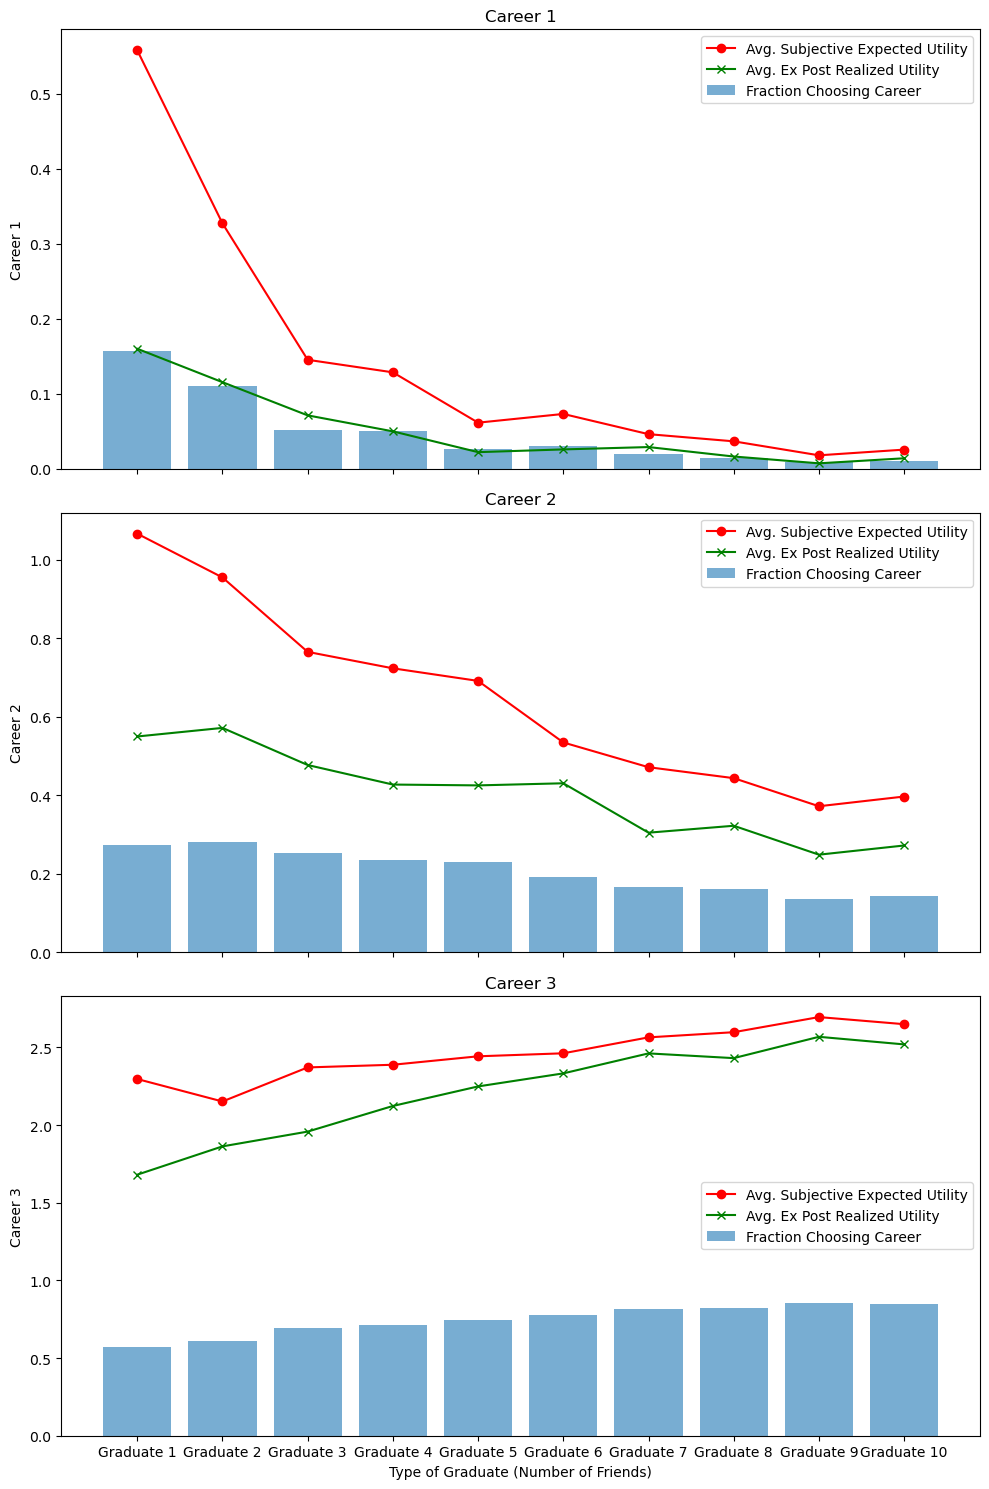

For Graduate 1:
  Fraction Choosing Career: [0.157 0.273 0.57 ]
  Average Subjective Expected Utility: [0.5579577  1.06699502 2.29654234]
  Average Ex Post Realized Utility: [0.16014377 0.55008971 1.68062775]

For Graduate 2:
  Fraction Choosing Career: [0.111 0.282 0.607]
  Average Subjective Expected Utility: [0.3272628  0.95542694 2.15197515]
  Average Ex Post Realized Utility: [0.11558102 0.57196263 1.86291939]

For Graduate 3:
  Fraction Choosing Career: [0.052 0.254 0.694]
  Average Subjective Expected Utility: [0.1454318  0.76570821 2.37130668]
  Average Ex Post Realized Utility: [0.07135697 0.47737019 1.95806807]

For Graduate 4:
  Fraction Choosing Career: [0.051 0.236 0.713]
  Average Subjective Expected Utility: [0.12870672 0.72381696 2.38848123]
  Average Ex Post Realized Utility: [0.05004533 0.42755313 2.12306957]

For Graduate 5:
  Fraction Choosing Career: [0.026 0.231 0.743]
  Average Subjective Expected Utility: [0.0616299  0.69174258 2.44284971]
  Average Ex Post Real

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 1000  # Number of simulations
par.sigma = 2

par.v = np.array([1, 2, 3])

# Initialize arrays to store results
fraction_choosing_career = np.zeros((par.N, par.J))
avg_subjective_expected_utility = np.zeros((par.N, par.J))
avg_ex_post_realized_utility = np.zeros((par.N, par.J))

# Simulation loop
for i in range(1, par.N + 1):
    F_i = i  # Number of friends for graduate i

    for k in range(par.K):
        # Draw epsilon_fjk for each friend and each career
        epsilons = np.random.normal(loc=0, scale=par.sigma, size=(F_i, par.J))

        # Calculate prior expected utility for each career j
        prior_expected_utilities = np.zeros(par.J)
        for j in range(par.J):
            prior_expected_utilities[j] = np.mean(par.v[j] + epsilons[:, j])

        # Determine the career track with maximum prior expected utility
        j_star = np.argmax(prior_expected_utilities)
        
        # Store results
        fraction_choosing_career[i-1, j_star] += 1
        avg_subjective_expected_utility[i-1, j_star] += prior_expected_utilities[j_star]
        avg_ex_post_realized_utility[i-1, j_star] += par.v[j_star] + np.random.normal(loc=0, scale=par.sigma)

# Normalize by the number of simulations
fraction_choosing_career /= par.K
avg_subjective_expected_utility /= par.K
avg_ex_post_realized_utility /= par.K

# Plotting results
career_labels = ['Career 1', 'Career 2', 'Career 3']
grad_labels = [f'Graduate {i+1}' for i in range(par.N)]

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for j in range(par.J):
    axes[j].bar(grad_labels, fraction_choosing_career[:, j], label='Fraction Choosing Career', alpha=0.6)
    axes[j].plot(grad_labels, avg_subjective_expected_utility[:, j], label='Avg. Subjective Expected Utility', marker='o', color='r')
    axes[j].plot(grad_labels, avg_ex_post_realized_utility[:, j], label='Avg. Ex Post Realized Utility', marker='x', color='g')
    axes[j].set_ylabel(f'Career {j+1}')
    axes[j].legend(loc='best')
    axes[j].set_title(f'Career {j+1}')

axes[-1].set_xlabel('Type of Graduate (Number of Friends)')

plt.tight_layout()
plt.show()

# Print averages
for i in range(par.N):
    print(f"For Graduate {i+1}:")
    print(f"  Fraction Choosing Career: {fraction_choosing_career[i]}")
    print(f"  Average Subjective Expected Utility: {avg_subjective_expected_utility[i]}")
    print(f"  Average Ex Post Realized Utility: {avg_ex_post_realized_utility[i]}")
    print()

 

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

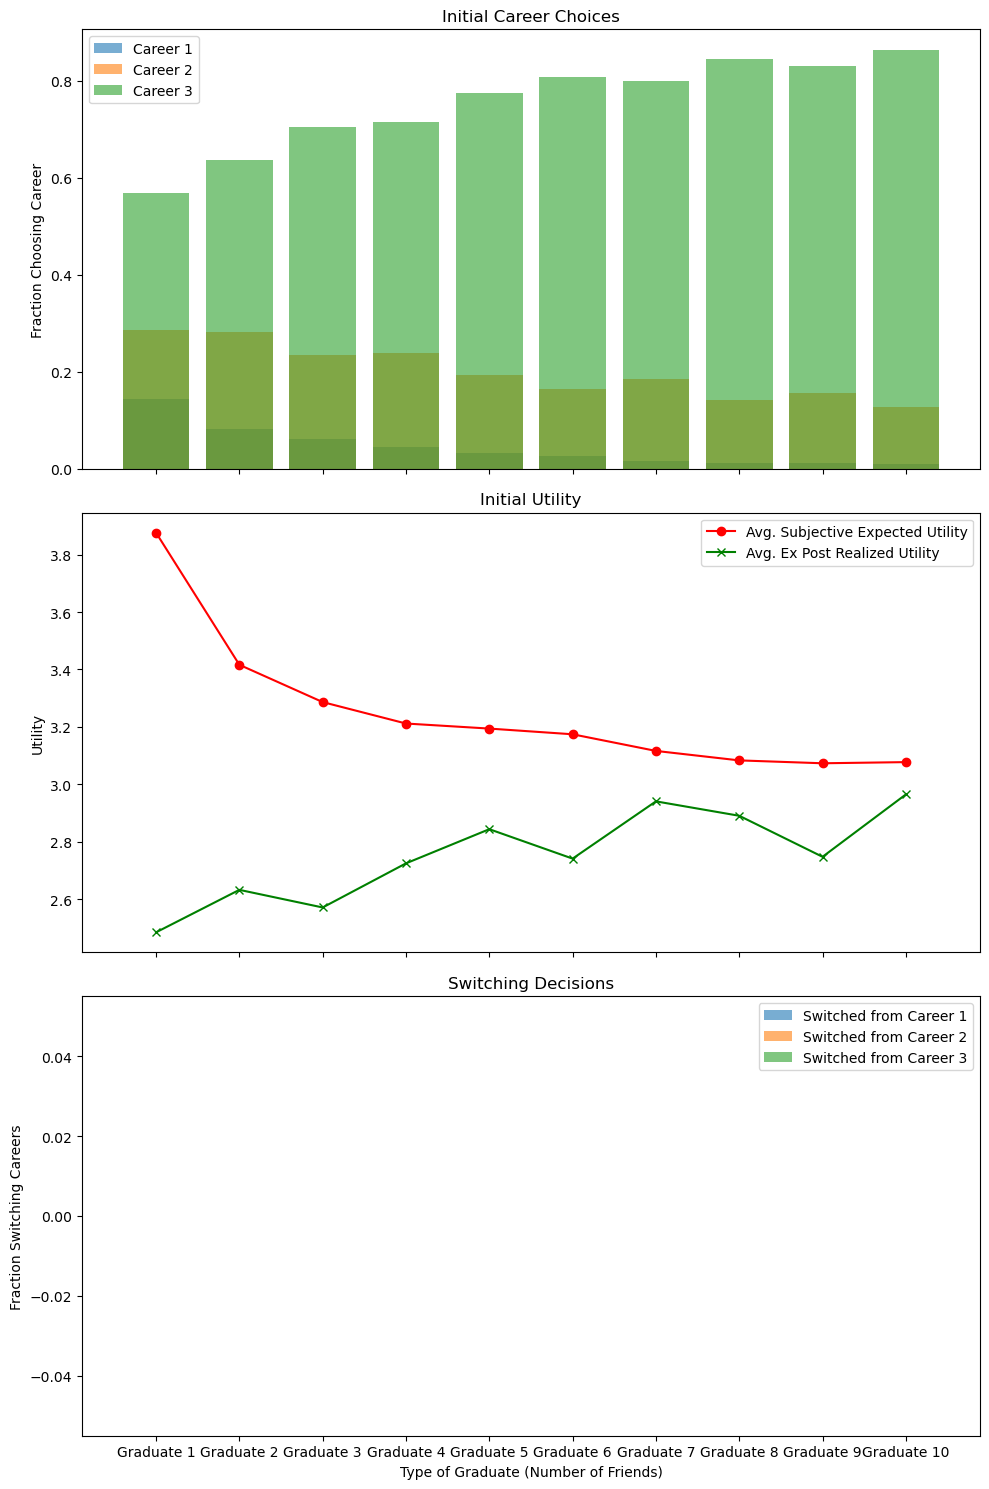

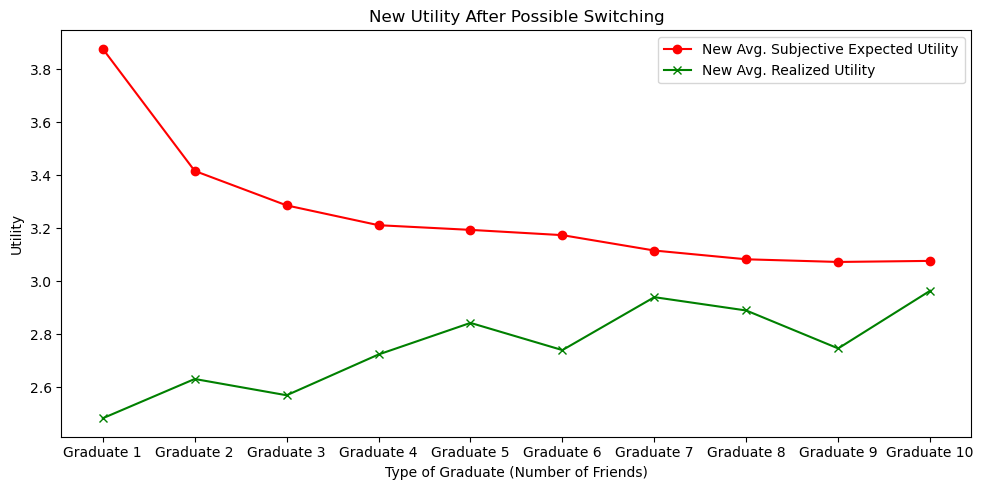

For Graduate 1:
  Fraction Choosing Each Career: [0.145 0.286 0.569]
  Average Subjective Expected Utility: [0.49140735 1.07204036 2.31293574]
  Average Ex Post Realized Utility: [0.16978468 0.59663244 1.71755203]
  Fraction Switching Career: [0. 0. 0.]
  New Average Subjective Expected Utility: 3.876383458563468
  New Average Realized Utility: 2.4839691498823084

For Graduate 2:
  Fraction Choosing Each Career: [0.082 0.282 0.636]
  Average Subjective Expected Utility: [0.23156926 0.9145194  2.27010213]
  Average Ex Post Realized Utility: [0.10086792 0.55727752 1.9738424 ]
  Fraction Switching Career: [0. 0. 0.]
  New Average Subjective Expected Utility: 3.4161907910520086
  New Average Realized Utility: 2.631987830978739

For Graduate 3:
  Fraction Choosing Each Career: [0.061 0.234 0.705]
  Average Subjective Expected Utility: [0.15963828 0.71290018 2.41370677]
  Average Ex Post Realized Utility: [0.07644491 0.4465039  2.04763988]
  Fraction Switching Career: [0. 0. 0.]
  New Averag

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace

# Define parameters
par = SimpleNamespace()
par.J = 3
par.N = 10
par.K = 1000  # Number of simulations
par.sigma = 2
par.c = 1  # Switching cost

par.v = np.array([1, 2, 3])

# Initialize arrays to store results
fraction_choosing_career = np.zeros((par.N, par.J))
avg_subjective_expected_utility = np.zeros((par.N, par.J))
avg_ex_post_realized_utility = np.zeros((par.N, par.J))

fraction_switching = np.zeros((par.N, par.J))
avg_new_subjective_expected_utility = np.zeros(par.N)
avg_new_realized_utility = np.zeros(par.N)

# Simulation loop
for i in range(1, par.N + 1):
    F_i = i  # Number of friends for graduate i

    for k in range(par.K):
        # Draw epsilon_fjk for each friend and each career
        epsilons = np.random.normal(loc=0, scale=par.sigma, size=(F_i, par.J))

        # Calculate prior expected utility for each career j
        prior_expected_utilities = np.zeros(par.J)
        for j in range(par.J):
            prior_expected_utilities[j] = np.mean(par.v[j] + epsilons[:, j])

        # Determine the career track with maximum prior expected utility
        j_star = np.argmax(prior_expected_utilities)
        
        # Calculate the realized utility of the chosen career
        realized_utility = par.v[j_star] + np.random.normal(loc=0, scale=par.sigma)
        
        # Store initial results
        fraction_choosing_career[i-1, j_star] += 1
        avg_subjective_expected_utility[i-1, j_star] += prior_expected_utilities[j_star]
        avg_ex_post_realized_utility[i-1, j_star] += realized_utility

        # Calculate new priors including the switching cost
        new_prior_expected_utilities = np.copy(prior_expected_utilities)
        new_realized_utilities = np.zeros(par.J)
        for j in range(par.J):
            if j != j_star:
                new_prior_expected_utilities[j] -= par.c
                new_realized_utilities[j] = par.v[j] + np.random.normal(loc=0, scale=par.sigma) - par.c
            else:
                new_realized_utilities[j] = realized_utility

        # Determine the new career track with maximum prior expected utility
        j_new_star = np.argmax(new_prior_expected_utilities)
        
        # Check if the graduate switches career
        if j_new_star != j_star:
            fraction_switching[i-1, j_star] += 1

        # Store new results
        avg_new_subjective_expected_utility[i-1] += new_prior_expected_utilities[j_new_star]
        avg_new_realized_utility[i-1] += new_realized_utilities[j_new_star]

# Normalize by the number of simulations
fraction_choosing_career /= par.K
avg_subjective_expected_utility /= par.K
avg_ex_post_realized_utility /= par.K
fraction_switching /= par.K
avg_new_subjective_expected_utility /= par.K
avg_new_realized_utility /= par.K

# Plotting results
career_labels = ['Career 1', 'Career 2', 'Career 3']
grad_labels = [f'Graduate {i+1}' for i in range(par.N)]

fig, axes = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

# Fraction of graduates choosing each career
for j in range(par.J):
    axes[0].bar(grad_labels, fraction_choosing_career[:, j], label=f'Career {j+1}', alpha=0.6)
axes[0].set_ylabel('Fraction Choosing Career')
axes[0].set_title('Initial Career Choices')
axes[0].legend(loc='best')

# Average subjective expected utility and realized utility
axes[1].plot(grad_labels, avg_subjective_expected_utility.sum(axis=1), label='Avg. Subjective Expected Utility', marker='o', color='r')
axes[1].plot(grad_labels, avg_ex_post_realized_utility.sum(axis=1), label='Avg. Ex Post Realized Utility', marker='x', color='g')
axes[1].set_ylabel('Utility')
axes[1].set_title('Initial Utility')
axes[1].legend(loc='best')

# Fraction of graduates switching careers
for j in range(par.J):
    axes[2].bar(grad_labels, fraction_switching[:, j], label=f'Switched from Career {j+1}', alpha=0.6)
axes[2].set_ylabel('Fraction Switching Careers')
axes[2].set_title('Switching Decisions')
axes[2].legend(loc='best')

axes[-1].set_xlabel('Type of Graduate (Number of Friends)')

plt.tight_layout()
plt.show()

# Plot new average subjective expected utility and realized utility
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(grad_labels, avg_new_subjective_expected_utility, label='New Avg. Subjective Expected Utility', marker='o', color='r')
ax.plot(grad_labels, avg_new_realized_utility, label='New Avg. Realized Utility', marker='x', color='g')
ax.set_ylabel('Utility')
ax.set_title('New Utility After Possible Switching')
ax.legend(loc='best')
ax.set_xlabel('Type of Graduate (Number of Friends)')

plt.tight_layout()
plt.show()

# Print new averages
for i in range(par.N):
    print(f"For Graduate {i+1}:")
    print(f"  Fraction Choosing Each Career: {fraction_choosing_career[i]}")
    print(f"  Average Subjective Expected Utility: {avg_subjective_expected_utility[i]}")
    print(f"  Average Ex Post Realized Utility: {avg_ex_post_realized_utility[i]}")
    print(f"  Fraction Switching Career: {fraction_switching[i]}")
    print(f"  New Average Subjective Expected Utility: {avg_new_subjective_expected_utility[i]}")
    print(f"  New Average Realized Utility: {avg_new_realized_utility[i]}")
    print()


## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.



**Sample:**

In [2]:
rng = np.random.default_rng(2024)

X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))

**Questions 1:** Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.

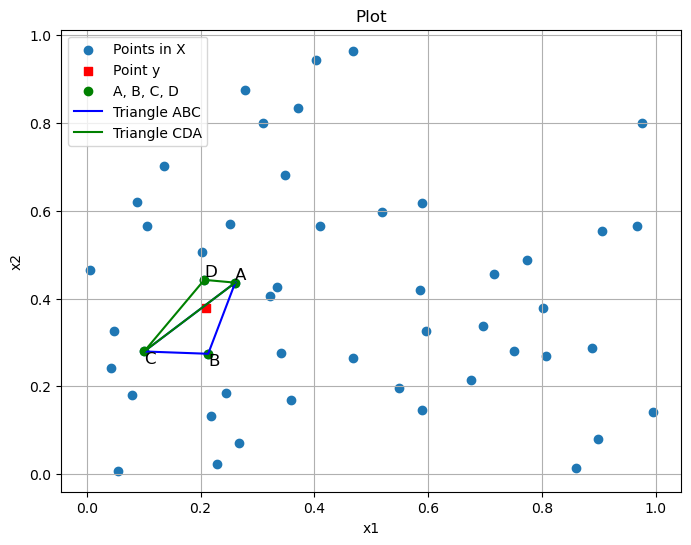

In [3]:
from examproject import problem3

rng = np.random.default_rng(2024)
X = rng.uniform(size=(50,2))
y = rng.uniform(size=(2,))
problem = problem3(X,y)
problem.plot()

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [4]:
problem.check_point_inside_triangle()

Point y is inside triangle ABC with barycentric coordinates (0.6286, 0.0691, 0.3023)
Point y is not inside triangle CDA with barycentric coordinates (0.3683, -0.1339, 0.7657)


Now consider the function:
$$
f(x_1,x_2) = x_1 \cdot x_2
$$

In [30]:
f = lambda x: x[0]*x[1]
F = np.array([f(x) for x in X])

**Question 3:** Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.

In [6]:
print(dir(problem))

['A', 'B', 'C', 'D', 'X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'check_point_inside_triangle', 'find_coordinates', 'find_point', 'find_points', 'plot', 'y']


In [91]:
import numpy as np

# Define the function f(x1, x2)
f = lambda x1, x2: x1 * x2

# Find A, B, C, D
A = min((x for x in X if x[0] > y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.nan)
B = min((x for x in X if x[0] > y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.nan)
C = min((x for x in X if x[0] < y[0] and x[1] < y[1]), key=lambda x: np.linalg.norm(x - y), default=np.nan)
D = min((x for x in X if x[0] < y[0] and x[1] > y[1]), key=lambda x: np.linalg.norm(x - y), default=np.nan)

# Check if any point is NaN (not found)
if any(np.isnan(point).any() for point in [A, B, C, D]):
    print("One or more points A, B, C, D could not be found.")
    # Handle this case as needed

# The true value of y
fy_true = f(y[0], y[1])

# Check which triangle y is inside
if r1_ABC >= 0 and r2_ABC >= 0 and r3_ABC >= 0:
    # Point y is inside triangle ABC
    approximation_ABC = r1_ABC * f(*A) + r2_ABC * f(*B) + r3_ABC * f(*C)
    print(f"Point y is inside triangle ABC with barycentric coordinates ({r1_ABC:.3f}, {r2_ABC:.3f}, {r3_ABC:.3f})")
    print(f"Approximation of f(y): {approximation_ABC:.3f}")
    print(f'True value of f(y):    {fy_true:.3f}')
elif r1_CDA >= 0 and r2_CDA >= 0 and r3_CDA >= 0:
    # Point y is inside triangle CDA
    approximation_CDA = r1_CDA * f(*C) + r2_CDA * f(*D) + r3_CDA * f(*A)
    print(f"Point y is inside triangle CDA with barycentric coordinates ({r1_CDA:.3f}, {r2_CDA:.3f}, {r3_CDA:.3f})")
    print(f"Approximation of f(y): {approximation_CDA:.3f}")
    print(f'True value of f(y): {fy_true:.3f}')
else:
    print("Point y is not inside triangle ABC or CDA")

diff = fy_true - approximation_ABC

print (f"Difference is {diff:.3f}")

Point y is inside triangle ABC with barycentric coordinates (0.629, 0.069, 0.302)
Approximation of f(y): 0.084
True value of f(y):    0.079
Difference is -0.005


**Question 4:** Repeat question 3 for all points in the set $Y$.

In [32]:
Y = [(0.2,0.2),(0.8,0.2),(0.8,0.8),(0.8,0.2),(0.5,0.5)]

In [92]:
# Helper function to find the closest point
def find_point(X, y, condition):
    points = X[condition]
    if points.size == 0:
        return np.nan, np.nan
    return points[np.argmin(np.linalg.norm(points - y, axis=1))]

results = []

for y in Y:
    # Compute points A, B, C, D
    A = find_point(X, y, (X[:, 0] > y[0]) & (X[:, 1] > y[1]))
    B = find_point(X, y, (X[:, 0] > y[0]) & (X[:, 1] < y[1]))
    C = find_point(X, y, (X[:, 0] < y[0]) & (X[:, 1] < y[1]))
    D = find_point(X, y, (X[:, 0] < y[0]) & (X[:, 1] > y[1]))

    # Compute true value of f(y)
    fy_true = f(y[0], y[1])

    # Check if any point is NaN (not found)
    if any(np.isnan(point).any() for point in [A, B, C, D]):
        f_y_approx = np.nan
    else:
        # Compute barycentric coordinates for triangle ABC
        denom_ABC = (B[1] - C[1]) * (A[0] - C[0]) + (C[0] - B[0]) * (A[1] - C[1])
        r1_ABC = ((B[1] - C[1]) * (y[0] - C[0]) + (C[0] - B[0]) * (y[1] - C[1])) / denom_ABC
        r2_ABC = ((C[1] - A[1]) * (y[0] - C[0]) + (A[0] - C[0]) * (y[1] - C[1])) / denom_ABC
        r3_ABC = 1 - r1_ABC - r2_ABC

        # Compute barycentric coordinates for triangle CDA
        denom_CDA = (D[1] - A[1]) * (C[0] - A[0]) + (A[0] - D[0]) * (C[1] - A[1])
        r1_CDA = ((D[1] - A[1]) * (y[0] - A[0]) + (A[0] - D[0]) * (y[1] - A[1])) / denom_CDA
        r2_CDA = ((A[1] - C[1]) * (y[0] - A[0]) + (C[0] - A[0]) * (y[1] - A[1])) / denom_CDA
        r3_CDA = 1 - r1_CDA - r2_CDA

        inside_ABC = (r1_ABC >= 0 and r2_ABC >= 0 and r3_ABC >= 0)
        inside_CDA = (r1_CDA >= 0 and r2_CDA >= 0 and r3_CDA >= 0)

        # Compute approximate value of f(y)
        if inside_ABC:
            f_y_approx = r1_ABC * f(*A) + r2_ABC * f(*B) + r3_ABC * f(*C)
        elif inside_CDA:
            f_y_approx = r1_CDA * f(*C) + r2_CDA * f(*D) + r3_CDA * f(*A)
        else:
            f_y_approx = np.nan

    # Store the results
    results.append((y, fy_true, f_y_approx))

# Print results
for result in results:
    y, f_y_true, f_y_approx = result
    print(f"Point y = {y}:")
    print(f"  True value of f(y): {f_y_true:.2f}")
    print(f"  Approximated value of f(y): {f_y_approx:.5f}")
    print()


Point y = (0.2, 0.2):
  True value of f(y): 0.04
  Approximated value of f(y): 0.04033

Point y = (0.8, 0.2):
  True value of f(y): 0.16
  Approximated value of f(y): 0.15874

Point y = (0.8, 0.8):
  True value of f(y): 0.64
  Approximated value of f(y): nan

Point y = (0.8, 0.2):
  True value of f(y): 0.16
  Approximated value of f(y): 0.15874

Point y = (0.5, 0.5):
  True value of f(y): 0.25
  Approximated value of f(y): 0.25129

